## 50k

In [ ]:
import re

with open("run_50k_steps.txt", "r") as f:
    lines = f.readlines()

steps = [line for line in lines if line[:4] == "step"]

val_steps = [step for step in steps if "val_loss" in step]

losses = [float(re.split(r"[ :]", val_step)[3]) for val_step in val_steps]

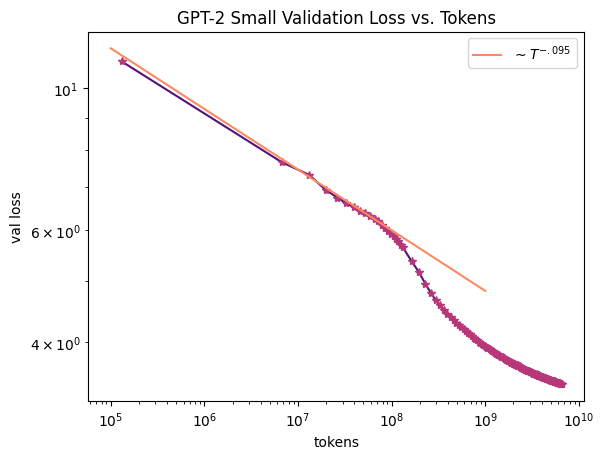

In [3]:
from matplotlib import pyplot as plt 
import numpy as np
import seaborn as sns

sns.set_palette("magma", n_colors=3)
xs = np.concatenate((np.arange(1, 1000, 50), np.arange(1000, 50000+2, 250)))

toks_per_step = 16*8*1024

plt.loglog([x*toks_per_step for x in xs], losses)
plt.loglog([x*toks_per_step for x in xs], losses, "*")
plt.loglog(np.logspace(5, 9, 50), [34.5*z**-0.095 for z in np.logspace(5, 9, 50)], label = r"$\sim T^{-.095}$")
plt.title("GPT-2 Small Validation Loss vs. Tokens")
plt.xlabel("tokens")
plt.ylabel("val loss")
plt.legend()
